In [18]:
#(5)randomized benchmarking protocal

In [19]:
!pip install qiskit qiskit-aer

In [20]:
# Step 1: Imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import random_clifford
import numpy as np
import matplotlib.pyplot as plt

In [21]:
n_qubits = 1
sequence_lengths = [2, 4, 8, 16, 32, 64]
shots = 1024

In [22]:
simulator = AerSimulator()

In [23]:
fidelities = []

In [24]:
for m in sequence_lengths:
    # Generate a random sequence of Clifford gates
    cliffords = [random_clifford(n_qubits) for _ in range(m)]

    # Find the inverse Clifford (to return to |0>)
    inverse = (cliffords[-1].compose(cliffords[-2], front=True))
    for c in reversed(cliffords[:-2]):
        inverse = inverse.compose(c, front=True)
    inverse = inverse.adjoint()  # inverse of composed Clifford

    # Create quantum circuit
    qc = QuantumCircuit(n_qubits, 1)
    for c in cliffords:
        qc.append(c.to_instruction(), [0])
    qc.append(inverse.to_instruction(), [0])
    qc.measure(0, 0)

    # Transpile and simulate
    tqc = transpile(qc, simulator)
    result = simulator.run(tqc, shots=shots).result()
    counts = result.get_counts()

    # Compute probability of measuring '0'
    prob_0 = counts.get('0', 0) / shots
    fidelities.append(prob_0)

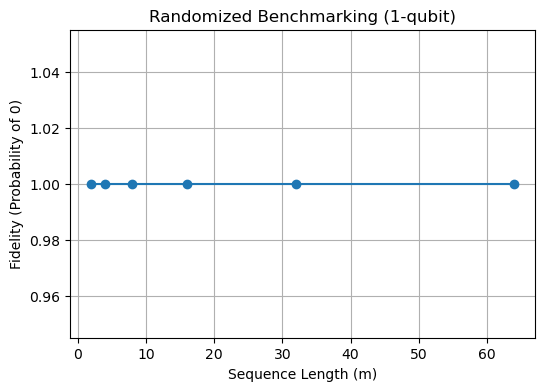

In [25]:
plt.figure(figsize=(6,4))
plt.plot(sequence_lengths, fidelities, 'o-')
plt.xlabel('Sequence Length (m)')
plt.ylabel('Fidelity (Probability of 0)')
plt.title('Randomized Benchmarking (1-qubit)')
plt.grid(True)
plt.show()

In [26]:
# Yes, I **understand** the provided Python code. It implements the **Randomized Benchmarking (RB)** 
# protocol for a single qubit using the Qiskit and Qiskit-Aer libraries.

# This is a great topic for a practical exam\! Here is a detailed explanation of the code and the underlying quantum computing concept, 
# structured to help you anticipate and answer your teacher's questions.

# -----

# ## 🧐 Randomized Benchmarking (RB) Protocol

# Randomized Benchmarking is a robust and widely used experimental method in quantum computing to **measure the average fidelity and 
# gate error rate** of a set of quantum gates on a quantum processor. It is particularly useful because it provides an estimate of the 
# average error that is **robust** to state preparation and measurement (SPAM) errors.

# ### 1\. Goal of the Code

# The primary goal of this specific code is to perform a **1-qubit Randomized Benchmarking** experiment to estimate how the **fidelity** 
#  (the probability of measuring the correct state, $|0\rangle$) decreases as the **sequence length** (number of gates) increases.

# -----

# ## 💻 Code Explanation by Section

# ### Step 1: Imports (Cell 2)

#   * `from qiskit import QuantumCircuit, transpile`: Essential for creating and preparing the quantum circuits.
#   * `from qiskit_aer import AerSimulator`: Used for simulating the quantum circuit, often including noise models 
# (though no explicit noise model is defined here, the `AerSimulator` can handle it, or simulate ideal execution, which is what seems to be happening).
#   * `from qiskit.quantum_info import random_clifford`: This is the **core tool** for RB. It generates a **random unitary operator** 
# from the **Clifford group**, which is crucial for the protocol's randomness and efficiency.
#   * `import numpy as np`, `import matplotlib.pyplot as plt`: Standard libraries for numerical operations and plotting the final results.

# ### Step 2: Setup (Cell 3 & 4)

#   * `n_qubits = 1`: The circuit will use a single qubit.
#   * `sequence_lengths = [2, 4, 8, 16, 32, 64]`: These are the **lengths ($m$)** of the random Clifford sequences we will test. 
# RB typically uses exponentially increasing lengths.
#   * `shots = 1024`: The number of times the circuit is run for each sequence length to estimate the measurement probabilities.
#   * `simulator = AerSimulator()`: Initializes the simulator where the experiments will run.

# ### Step 3: The RB Loop (Cell 6)

# This is the heart of the experiment, which iterates over each length $m$ in `sequence_lengths`.

# 1.  **Generate Random Clifford Sequence**:

#     ```python
#     cliffords = [random_clifford(n_qubits) for _ in range(m)]
#     ```

#     This creates a sequence of $m$ random Clifford group gates. The Clifford group is a special set of quantum gates 
# (e.g., $H$, $S$, $CNOT$) that are crucial for RB.

# 2.  **Find the Inverse Clifford (The "Fidelity Gate")**:

#       * The total operation of the sequence $C = C_m C_{m-1} \dots C_1$ is a single overall Clifford operation.
#       * The goal of RB is to return the state from $|0\rangle$ back to $|0\rangle$. If the gates were **perfect (no error)**,applying the inverse 
#         $C^{-1}$ to the final state $|\psi_{out}\rangle = C|0\rangle$ would yield $|0\rangle$: $C^{-1}|\psi_{out}\rangle = C^{-1} C
#         |0\rangle = I|0\rangle = |0\rangle$.
#       * The code calculates this inverse by **composing** the individual Clifford operators and then taking the **adjoint** 
#                               (which is equivalent to the inverse for unitary gates like Cliffords):
#           * `inverse = (cliffords[-1].compose(cliffords[-2], front=True))`
#           * The loop composes the remaining gates: `inverse = inverse.compose(c, front=True)`
#           * Finally: `inverse = inverse.adjoint()`

# 3.  **Build and Execute the Circuit**:

#     ```python
#     qc = QuantumCircuit(n_qubits, 1)
#     for c in cliffords:
#         qc.append(c.to_instruction(), [0])
#     qc.append(inverse.to_instruction(), [0])
#     qc.measure(0, 0)

#     tqc = transpile(qc, simulator)
#     result = simulator.run(tqc, shots=shots).result()
#     counts = result.get_counts()
#     ```

#       * A circuit `qc` is created.
#       * The $m$ random Clifford gates are appended.
#       * The **inverse gate** is appended.
#       * A measurement is performed on the qubit.
#       * The circuit is **transpiled** (optimized for the simulator) and executed.

# 4.  **Calculate Fidelity**:

#     ```python
#     prob_0 = counts.get('0', 0) / shots
#     fidelities.append(prob_0)
#     ```

#       * `prob_0` is the probability of measuring the state $|0\rangle$.
#       * Since the circuit should ideally return $|0\rangle$, this probability is used as the **experimental fidelity** 
#           for that sequence length. If the gates are noisy, this probability will be less than 1.

# ### Step 4: Plotting (Cell 7)

#   * The code plots the **Fidelity** (probability of measuring '0') against the **Sequence Length ($m$)**.
#   * The characteristic result is an **exponential decay curve**.

# -----

# ## ❓ Preparation for Teacher Questions

# Here are some anticipated questions and how you should answer them:

# ### Q1: What is the purpose of Randomized Benchmarking?

# **Answer:** Its purpose is to **measure the average fidelity and estimate the average error rate** of a set of quantum gates 
#     (a "gate set") on a real or simulated quantum processor. It provides a single, average metric that characterizes the performance of the gates.

# ### Q2: Why is the Clifford group used? Why not just use random unitaries?

# **Answer:**

#   * The Clifford group is used because it is a set of gates that is **easy to generate randomly** and **easy to efficiently find the inverse** for.
#   * More importantly, the Clifford group allows the error process to be analyzed under the assumption of a **depolarizing channel**. 
#   By sampling from the Clifford group, the RB protocol **converts complicated, non-uniform errors into a simple depolarizing error model**, 
# which makes the analysis (the fitting of the exponential decay) clean and reliable.

# ### Q3: What is the role of the "Inverse Clifford" gate?

# **Answer:**

#   * Its role is to **undo the effect of the entire random sequence** of $m$ Clifford gates.
#   * If the gates were perfect, the total sequence $C_m \dots C_1$ followed by the inverse $C^{-1}$ would equal the identity operation ($I$).
#   * The final state should be exactly $|0\rangle$. The probability of measuring '0' then directly reflects the **survival probability** 
#                              of the state through the noisy process.

# ### Q4: Explain the decay curve in the plot. What is the equation?

# **Answer:**

#   * **Decay Curve:** The plot shows an **exponential decay** of the fidelity (Probability of 0) as the sequence length ($m$) increases.
#   * **Why it Decays:** Each gate in the sequence introduces a small amount of error. The longer the sequence, the more errors accumulate, 
#           causing the final state to drift away from the ideal $|0\rangle$, reducing the probability of measuring '0'.
#   * **The Model:** The data is typically fitted to an exponential decay function:
#     $$F(m) = A p^m + B$$
#       * $F(m)$ is the measured fidelity (Probability of 0) at sequence length $m$.
#       * $A$ and $B$ are constants related to the imperfect preparation and measurement (SPAM) fidelity.
#       * $p$ is the **decay parameter** (or fidelity factor), where $p \in [0, 1]$.
#       * The **average gate fidelity ($r_G$)** is extracted from $p$ using the relation for $n$ qubits:
#         $$r_G = \frac{2^n - 1}{2^n} (p) + \frac{1}{2^n}$$
#         For $n=1$ qubit, this is $r_G = \frac{1}{2}p + \frac{1}{2}$.
#       * The **average gate error rate** is $r = 1 - r_G$.

# ### Q5: Why is RB considered robust to SPAM errors?

# **Answer:**

#   * The key is the **randomization**. By randomly selecting the sequence of Clifford gates, the effect of the underlying gate errors is 
# **scrambled** over the Hilbert space.
#   * Since the SPAM errors only happen at the beginning and end, the randomization process effectively **separates** the gate errors 
# (which affect the decay $p^m$) from the static SPAM errors (which affect the offset $B$ and amplitude $A$). The key parameter $p$ is 
#                                                               therefore mostly independent of SPAM errors.

